<a href="https://colab.research.google.com/github/mrymsadeghi/Colab_notebooks/blob/main/train_plate_OCR_ir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
import keras
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VdwBRxsJsFmCMW94xJjd")
project = rf.workspace("object-detection-yolov5").project("plate_ocr_ir")
dataset = project.version(2).download("folder")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to plate_ocr_ir-2 in folder:: 100%|██████████| 9658/9658 [00:03<00:00, 3146.72it/s]


In [ ]:
train_path = "/content/plate_ocr_ir-2/train"
valid_path = "/content/plate_ocr_ir-2/valid"
test_path = "/content/plate_ocr_ir-2/test"

In [ ]:
class_names = subdirs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'ch', 'd', 'ein', 'f', 'g', 'ghaf', 'ghein', 'h2', 'hj', 'j', 'k', 'kh', 'l', 'm', 'n', 'p', 'r', 's', 'sad', 'sh', 't', 'ta', 'th', 'v', 'y', 'z', 'za', 'zad', 'zal', 'zh']
num_classes = len(class_names)

In [ ]:
labels_nums = [i for i in range(0,len(class_names))]
print(labels_nums)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


In [ ]:
train_imgs = []
train_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(train_path, subdir)
  for imgname in os.listdir(imgfolder):
    img = cv.imread(os.path.join(imgfolder, imgname), 0)
    train_imgs.append(img)
    train_labels.append(labels_nums[indx])

c = list(zip(train_imgs, train_labels))
random.shuffle(c)
train_imgs, train_labels = zip(*c)

train_images = np.array(train_imgs)
train_labels = np.array(train_labels)

In [ ]:
valid_imgs = []
valid_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(valid_path, subdir)
  if os.path.exists(imgfolder):
    for imgname in os.listdir(imgfolder):
      img = cv.imread(os.path.join(imgfolder, imgname), 0)
      valid_imgs.append(img)
      valid_labels.append(labels_nums[indx])

c = list(zip(valid_imgs, valid_labels))
random.shuffle(c)
valid_imgs, valid_labels = zip(*c)

test_images = np.array(valid_imgs)
test_labels = np.array(valid_labels)

b
11


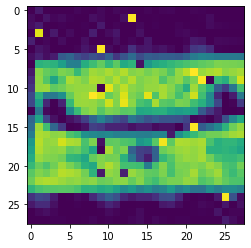

In [ ]:
num=90
print(class_names[train_labels[num]])
print(train_labels[num])
plt.imshow(train_images[num])

In [ ]:
test_labels.shape

(792,)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=200)


In [ ]:

predictions = model.predict(test_images)


In [ ]:
model.save('saved_model/simple_ocr_plates_model')

In [ ]:
!zip -r /content/saved_model/simple_ocr_plates_model.zip /content/saved_model/simple_ocr_plates_model

  adding: content/saved_model/simple_ocr_plates_model/ (stored 0%)
  adding: content/saved_model/simple_ocr_plates_model/assets/ (stored 0%)
  adding: content/saved_model/simple_ocr_plates_model/variables/ (stored 0%)
  adding: content/saved_model/simple_ocr_plates_model/variables/variables.data-00000-of-00001 (deflated 24%)
  adding: content/saved_model/simple_ocr_plates_model/variables/variables.index (deflated 59%)
  adding: content/saved_model/simple_ocr_plates_model/keras_metadata.pb (deflated 85%)
  adding: content/saved_model/simple_ocr_plates_model/saved_model.pb (deflated 87%)


In [ ]:
ocr_model = tf.keras.models.load_model('simple_ocr_plates_model')

In [ ]:
test_img_path = "/content/plate_ocr_ir-2/test/ch/c_250_png.rf.d3aa38e2f0156f1ca06bf9206f7966aa.jpg"
test_img = cv.imread(test_img_path, 0)
test_img = np.expand_dims(test_img, axis=0)
predictions = ocr_model.predict(test_images)

In [ ]:
class_names[np.argmax(predictions[0])]

'm'

In [ ]:
test_imgs = []
test_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(test_path, subdir)
  if os.path.exists(imgfolder):
    for imgname in os.listdir(imgfolder):
      img = cv.imread(os.path.join(imgfolder, imgname), 0)
      test_imgs.append(img)
      test_labels.append(labels_nums[indx])

c = list(zip(test_imgs, test_labels))
random.shuffle(c)
test_imgs, test_labels = zip(*c)

test_images = np.array(test_imgs)
test_labels = np.array(test_labels)

In [ ]:

predictions = ocr_model.predict(test_images)

zh
41


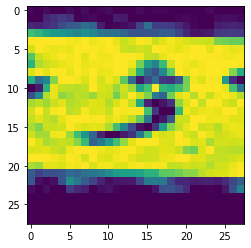

In [ ]:
num=30
print(class_names[np.argmax(predictions[num])])
print(np.argmax(predictions[num]))
plt.imshow(test_images[num])

Text(69.0, 0.5, 'Truth')

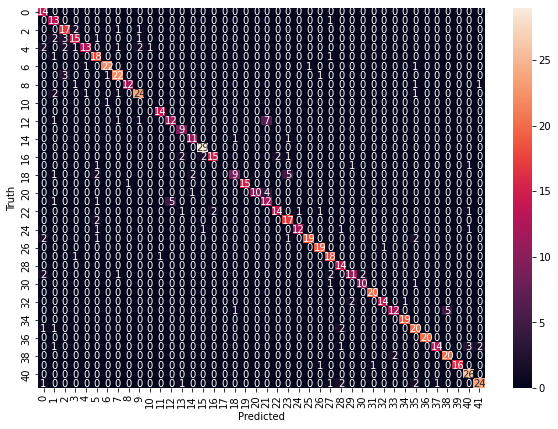

In [ ]:
y_predicted = model.predict(test_images)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=test_labels, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')